# Twitter Crawling with Snscrape

In [ ]:
# importing libraries and packages
import snscrape.modules.twitter as sntwitter
from tqdm.notebook import tqdm_notebook 
import pandas as pd
import json
import re

In [ ]:
from datetime import datetime, timedelta, date

## To crawl first week's tweets

### Crawl with the first key words: ohio train

In [ ]:
# Creating list to append tweet data 
tweets_list1 = []
tweets_list2 = []
# Using TwitterSearchScraper to scrape data and append tweets to list
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('ohio train lang:en since:2023-02-03 until:2023-02-11').get_items()): #declare a username 
    if i>20000: #number of tweets you want to scrape
        break
    tweets_list1.append([tweet.date, tweet.id, tweet.rawContent, tweet.user.username, tweet.replyCount, tweet.likeCount]) #declare the attributes to be returned
    tweets_list2.append(tweet)

### Crawl with the second key words: ohio derailment

In [ ]:
for i,tweet in enumerate(tqdm_notebook(sntwitter.TwitterSearchScraper('ohio derailment lang:en since:2023-02-03 until:2023-02-11').get_items())): #declare a username 
    if i>20000: #number of tweets you want to scrape
        break
    tweets_list1.append([tweet.date, tweet.id, tweet.rawContent, tweet.user.username, tweet.replyCount, tweet.likeCount]) #declare the attributes to be returned
    tweets_list2.append(tweet)

0it [00:00, ?it/s]

In [ ]:
tweets_df1 = pd.DataFrame(tweets_list1, columns=['Datetime', 'Tweet Id', 'RawText', 'Username', 'replyCount', 'likeCount'])
tweets_df1["Text"] = tweets_df1.RawText.apply(lambda x : ' '.join(re.sub("@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"," ",x).split()))
tweets_df1["Date"] = tweets_df1.Datetime.dt.date

In [ ]:
tweets_df1.drop_duplicates("Tweet Id", inplace=True)

In [ ]:
tweets_df1.reset_index(inplace=True)

### Save the first week's tweet

In [ ]:
tweets_df1.to_pickle("tweets1.pkl")

In [ ]:
tweets_df1

,index,Datetime,Tweet Id,RawText,Username,replyCount,likeCount,Text,Date
0,0,2023-02-10 23:57:18+00:00,1624195837667708930,@EmirhanK3434 @growing_daniel A train derailed...,Lib_Development,0,16,growing daniel A train derailed in an ohio tow...,2023-02-10
1,1,2023-02-10 23:55:24+00:00,1624195360355926016,@JDVance1 I am sure @TimRyan would be tweeting...,Evalyn27,2,11,I am sure TimRyan would be tweeting about the ...,2023-02-10
2,2,2023-02-10 23:54:17+00:00,1624195079475716096,Really hope Congress looks into the train dera...,dross1705,0,0,Really hope Congress looks into the train dera...,2023-02-10
3,3,2023-02-10 23:53:09+00:00,1624194794095362050,#Ohio citizens are concerned:\n Lawsuit seeks ...,Ohiomom6,0,4,Ohio citizens are concerned Lawsuit seeks medi...,2023-02-10
4,4,2023-02-10 23:51:50+00:00,1624194461684072448,"We have reached the ""Arresting reporters for r...",greyweirdo,0,0,We have reached the Arresting reporters for re...,2023-02-10
...,...,...,...,...,...,...,...,...,...
8360,13044,2023-02-04 08:17:44+00:00,1621785062042701824,Ohio practice derailment causes huge hearth in...,freeusaquotes,0,0,Ohio practice derailment causes huge hearth in...,2023-02-04
8361,13110,2023-02-04 05:53:13+00:00,1621748691999637504,"My son called me saying, Mom I have an emergen...",deelightfulEP,0,5,My son called me saying Mom I have an emergenc...,2023-02-04
8362,13145,2023-02-04 04:34:02+00:00,1621728763158437891,.@nscorp released statement regarding #trainde...,lauren_linder,0,3,nscorp released statement regarding trainderai...,2023-02-04
8363,13158,2023-02-04 04:11:08+00:00,1621723002768343041,@Nerdy_Addict I hope the derailment in Ohio ca...,LordBitchmort,2,2,I hope the derailment in Ohio causing a massiv...,2023-02-04


## To crawl second week's tweets

In [ ]:
tweets_list1 = []
tweets_list2 = []

In [ ]:
startdate = date(2023,2,10)
enddate = date(2023,2,15)
delta = timedelta(days=1)

In [ ]:
startdate.strftime("%Y-%m-%d")

'2023-02-10'

### Crawl with the first key words: ohio train

In [ ]:
# Using TwitterSearchScraper to scrape data and append tweets to list
while startdate < enddate:
    for i,tweet in enumerate(tqdm_notebook(sntwitter.TwitterSearchScraper(f'ohio train lang:en since:{startdate.strftime("%Y-%m-%d")} until:{(startdate+delta).strftime("%Y-%m-%d")}').get_items())): #declare a username 
        if i>20000: #number of tweets you want to scrape
            break
        tweets_list1.append([tweet.date, tweet.id, tweet.rawContent, tweet.user.username, tweet.replyCount, tweet.likeCount]) #declare the attributes to be returned
        tweets_list2.append(tweet)
    startdate += delta

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

In [ ]:
startdate = date(2023,2,15)
enddate = date(2023,2,18)
delta = timedelta(days=1)

In [ ]:
while startdate < enddate:
    for i,tweet in enumerate(tqdm_notebook(sntwitter.TwitterSearchScraper(f'ohio train lang:en since:{startdate.strftime("%Y-%m-%d")} until:{(startdate+delta).strftime("%Y-%m-%d")}').get_items())): #declare a username 
        if i>30000: #number of tweets you want to scrape
            break
        tweets_list1.append([tweet.date, tweet.id, tweet.rawContent, tweet.user.username, tweet.replyCount, tweet.likeCount]) #declare the attributes to be returned
        tweets_list2.append(tweet)
    startdate += delta

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

### Crawl with second key words: ohio derailment

In [ ]:
startdate = date(2023,2,11)
enddate = date(2023,2,18)
delta = timedelta(days=1)
while startdate < enddate:
    for i,tweet in enumerate(tqdm_notebook(sntwitter.TwitterSearchScraper(f'ohio derailment lang:en since:{startdate.strftime("%Y-%m-%d")} until:{(startdate+delta).strftime("%Y-%m-%d")}').get_items())): #declare a username 
        if i>30000: #number of tweets you want to scrape
            break
        tweets_list1.append([tweet.date, tweet.id, tweet.rawContent, tweet.user.username, tweet.replyCount, tweet.likeCount]) #declare the attributes to be returned
        tweets_list2.append(tweet)
    startdate += delta

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

In [ ]:
len(tweets_list1)

67755

In [ ]:
tweets_df2 = pd.DataFrame(tweets_list1, columns=['Datetime', 'Tweet Id', 'RawText', 'Username', 'replyCount', 'likeCount'])
tweets_df2["Text"] = tweets_df2.RawText.apply(lambda x : ' '.join(re.sub("@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"," ",x).split()))
tweets_df2

,Datetime,Tweet Id,RawText,Username,replyCount,likeCount,Text
0,2023-02-10 23:57:18+00:00,1624195837667708930,@EmirhanK3434 @growing_daniel A train derailed...,Lib_Development,0,16,growing daniel A train derailed in an ohio tow...
1,2023-02-10 23:55:24+00:00,1624195360355926016,@JDVance1 I am sure @TimRyan would be tweeting...,Evalyn27,2,11,I am sure TimRyan would be tweeting about the ...
2,2023-02-10 23:54:17+00:00,1624195079475716096,Really hope Congress looks into the train dera...,dross1705,0,0,Really hope Congress looks into the train dera...
3,2023-02-10 23:53:09+00:00,1624194794095362050,#Ohio citizens are concerned:\n Lawsuit seeks ...,Ohiomom6,0,4,Ohio citizens are concerned Lawsuit seeks medi...
4,2023-02-10 23:51:50+00:00,1624194461684072448,"We have reached the ""Arresting reporters for r...",greyweirdo,0,0,We have reached the Arresting reporters for re...
...,...,...,...,...,...,...,...
110923,2023-02-17 00:00:07+00:00,1626370875636297728,Biden admin turns down Ohio's request for disa...,lllggg92591580,0,0,Biden admin turns down Ohio s request for disa...
110924,2023-02-17 00:00:06+00:00,1626370870284361729,Rubio calls for Buttigieg’s resignation follow...,Matthew73610025,0,0,Rubio calls for Buttigieg s resignation follow...
110925,2023-02-17 00:00:03+00:00,1626370858099802116,"After toxic cybertrain derailment, Ohio cyberr...",cyberprefixer,0,0,After toxic cybertrain derailment Ohio cyberre...
110926,2023-02-17 00:00:02+00:00,1626370853528129539,Residents of an Ohio village upended by a frei...,MyNews13,0,0,Residents of an Ohio village upended by a frei...


### Save the second week's tweet

In [ ]:
tweets_df2.drop_duplicates("Tweet Id", inplace=True)
tweets_df2.reset_index(inplace=True)
tweets_df2.to_pickle("tweets2.pkl")

In [ ]:
tweets_df2

,index,Datetime,Tweet Id,RawText,Username,replyCount,likeCount,Text
0,0,2023-02-10 23:57:18+00:00,1624195837667708930,@EmirhanK3434 @growing_daniel A train derailed...,Lib_Development,0,16,growing daniel A train derailed in an ohio tow...
1,1,2023-02-10 23:55:24+00:00,1624195360355926016,@JDVance1 I am sure @TimRyan would be tweeting...,Evalyn27,2,11,I am sure TimRyan would be tweeting about the ...
2,2,2023-02-10 23:54:17+00:00,1624195079475716096,Really hope Congress looks into the train dera...,dross1705,0,0,Really hope Congress looks into the train dera...
3,3,2023-02-10 23:53:09+00:00,1624194794095362050,#Ohio citizens are concerned:\n Lawsuit seeks ...,Ohiomom6,0,4,Ohio citizens are concerned Lawsuit seeks medi...
4,4,2023-02-10 23:51:50+00:00,1624194461684072448,"We have reached the ""Arresting reporters for r...",greyweirdo,0,0,We have reached the Arresting reporters for re...
...,...,...,...,...,...,...,...,...
76112,110915,2023-02-17 00:00:59+00:00,1626371093371002880,Here’s some help for you folks in Ohio that ar...,BruceWi80936415,0,1,Here s some help for you folks in Ohio that ar...
76113,110918,2023-02-17 00:00:49+00:00,1626371050882605058,@JoeBiden Environment activist #ErinBrockovich...,459c9799a43e485,0,0,Environment activist ErinBrockovich is calling...
76114,110923,2023-02-17 00:00:07+00:00,1626370875636297728,Biden admin turns down Ohio's request for disa...,lllggg92591580,0,0,Biden admin turns down Ohio s request for disa...
76115,110925,2023-02-17 00:00:03+00:00,1626370858099802116,"After toxic cybertrain derailment, Ohio cyberr...",cyberprefixer,0,0,After toxic cybertrain derailment Ohio cyberre...


# Data Analysis

In [ ]:
import re
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from datetime import datetime, timedelta
import snscrape.modules.twitter as sntwitter

### Read the data processed by LIWC

In [32]:
result1 = pd.read_csv("LIWC-22 Results - tweets1 - LIWC Analysis.csv", index_col=0)
result1 = result1.iloc[:,1:]
result2 = pd.read_csv("LIWC-22 Results - tweets2 - LIWC Analysis.csv", index_col=0)
result2 = result2.rename(columns={"just_date":"Date"})

In [33]:
temp1 = result1.drop(['Datetime', 'RawText','Text','Tweet Id','Username','replyCount','replyCount','Affect'], axis=1).groupby(by=["Date"]).sum()
temp2 = result2.drop(['Datetime', 'RawText','Text','Tweet Id','Username','replyCount','replyCount','Affect'], axis=1).groupby(by=["Date"]).sum()
total = pd.concat([temp1, temp2], axis=0)
total = total.rename({'Segment': 'Tweet Number'}, axis=1)

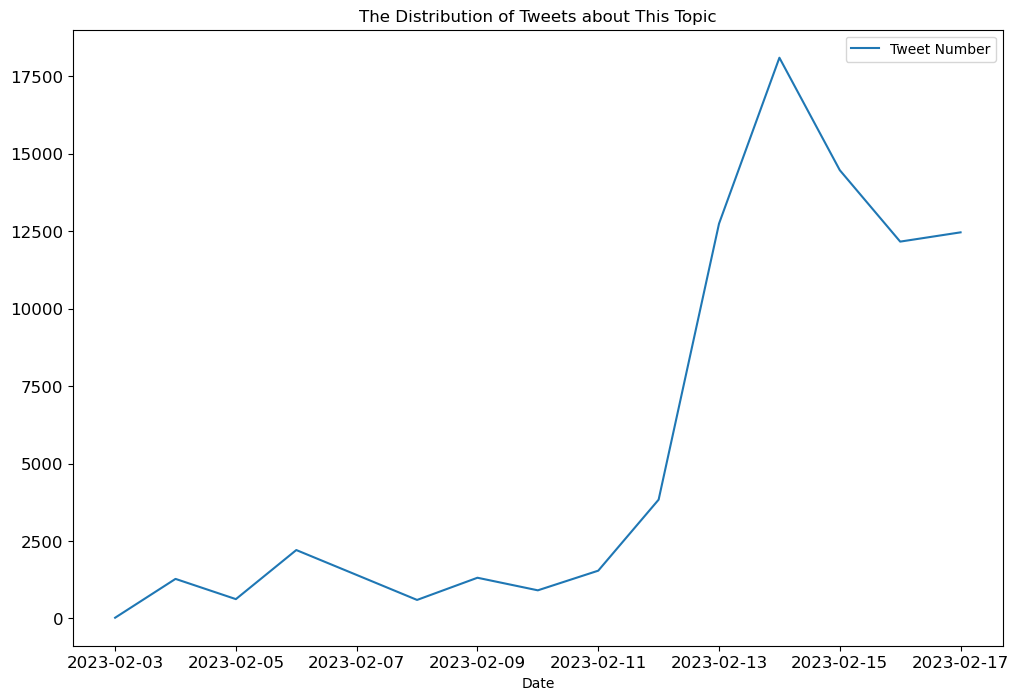

In [34]:
lines2 = total.plot.line( y=['Tweet Number'],figsize=(12,8),fontsize=12,title='The Distribution of Tweets about This Topic')

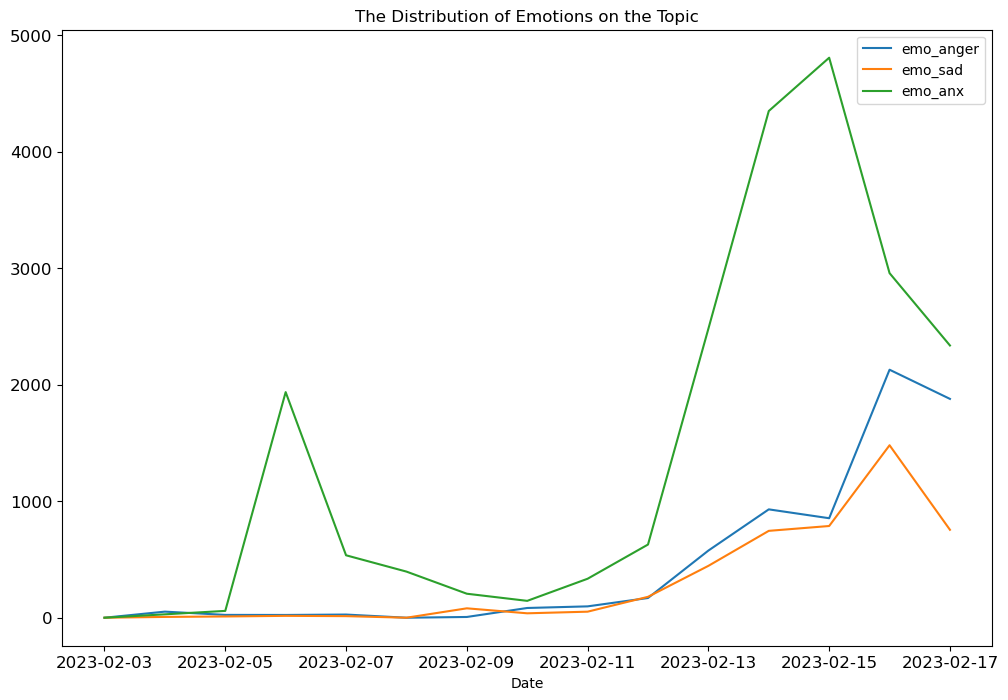

In [35]:
lines = total.plot.line( y=['emo_anger','emo_sad','emo_anx'],figsize=(12,8),fontsize=12,title='The Distribution of Emotions on the Topic')

In [36]:
data = pd.concat([result1,result2],ignore_index=True)

In [37]:
data['Datetime'] = pd.to_datetime(data['Datetime'])

In [38]:
max_x = data.loc[data['replyCount'].idxmax()]

### Crawl the replies to the most reply tweet

In [39]:
def process_text(text):
    res=[]
    words=text.split()
    for i in range(len(words)):
        if '@' in words[i]:
            res.append(words[i][1:])
        else:
            break
    return res

In [40]:
def find_reply_to_user(time,user,con_id):
    count=0
    name='@'+str(user)
    date=str(time.year)+'-'+str(time.month)+'-'+str(time.day)
    date2=time+timedelta(days=1)
    date3=date2+timedelta(days=1)
    date2=str(date2.year)+'-'+str(date2.month)+'-'+str(date2.day)
    date3=str(date3.year)+'-'+str(date3.month)+'-'+str(date3.day)    
    total_search1=name+' since:'+str(date)+' until:'+date2
    total_search2=name+' since:'+str(date2)+' until:'+date3
    Exact_time=[]
    sender=[]
    receiver=[]
    print(total_search1,con_id)
    for i,tweet in enumerate(sntwitter.TwitterSearchScraper(total_search1).get_items()): #declare a username 
        if i>15000:#number of tweets you want to scrape
            break
        if tweet.conversationId==int(con_id):
            count=count+1
            sender.append(tweet.user.username)
            receiver.append(process_text(tweet.rawContent))
            Exact_time.append(tweet.date)
    for j,tweet in enumerate(sntwitter.TwitterSearchScraper(total_search2).get_items()): #declare a username 
        if j>15000:
            print('max reached: ',count,' The con_id is ',con_id)#number of tweets you want to scrape
            break
        if tweet.conversationId==int(con_id):
            count=count+1
            sender.append(tweet.user.username)
            receiver.append(process_text(tweet.rawContent))
            Exact_time.append(tweet.date)
    return sender,receiver,Exact_time

In [41]:
a,b,c=find_reply_to_user(max_x['Datetime'],'RepMTG',1624910190847094784)

@RepMTG since:2023-2-12 until:2023-2-13 1624910190847094784


C:\Users\Jayden\AppData\Local\Temp\ipykernel_26908\3320258704.py:21: FutureWarning: content is deprecated, use rawContent instead
  receiver.append(process_text(tweet.content))
C:\Users\Jayden\AppData\Local\Temp\ipykernel_26908\3320258704.py:30: FutureWarning: content is deprecated, use rawContent instead
  receiver.append(process_text(tweet.content))


max reached:  3491  The con_id is  1624910190847094784


In [25]:
for i in range(len(b)):
    b[i].insert(0,a[i])

In [32]:
comment_network=pd.DataFrame(columns=['Sender','Reciever'])

In [122]:
for i in range(len(b)):
    for j in range(len(b[i])-1):
        new_row = { 'Sender':b[i][j], 'Reciever':b[i][j+1]}
        comment_network = comment_network.append(new_row, ignore_index=True)

In [36]:
comment_network=comment_network.drop_duplicates()

In [37]:
import networkx as nx

In [105]:
G=nx.Graph()

In [106]:
for i in range(len(comment_network)):
    G.add_edge(comment_network.iloc[i,0],comment_network.iloc[i,1]) 

In [107]:
pos = nx.spring_layout(G)

In [108]:
degree_dict = dict(nx.degree(G))

In [109]:
import matplotlib.pyplot as plt

In [110]:
from matplotlib.pyplot import figure

### Visualization of the largest reply netwrok

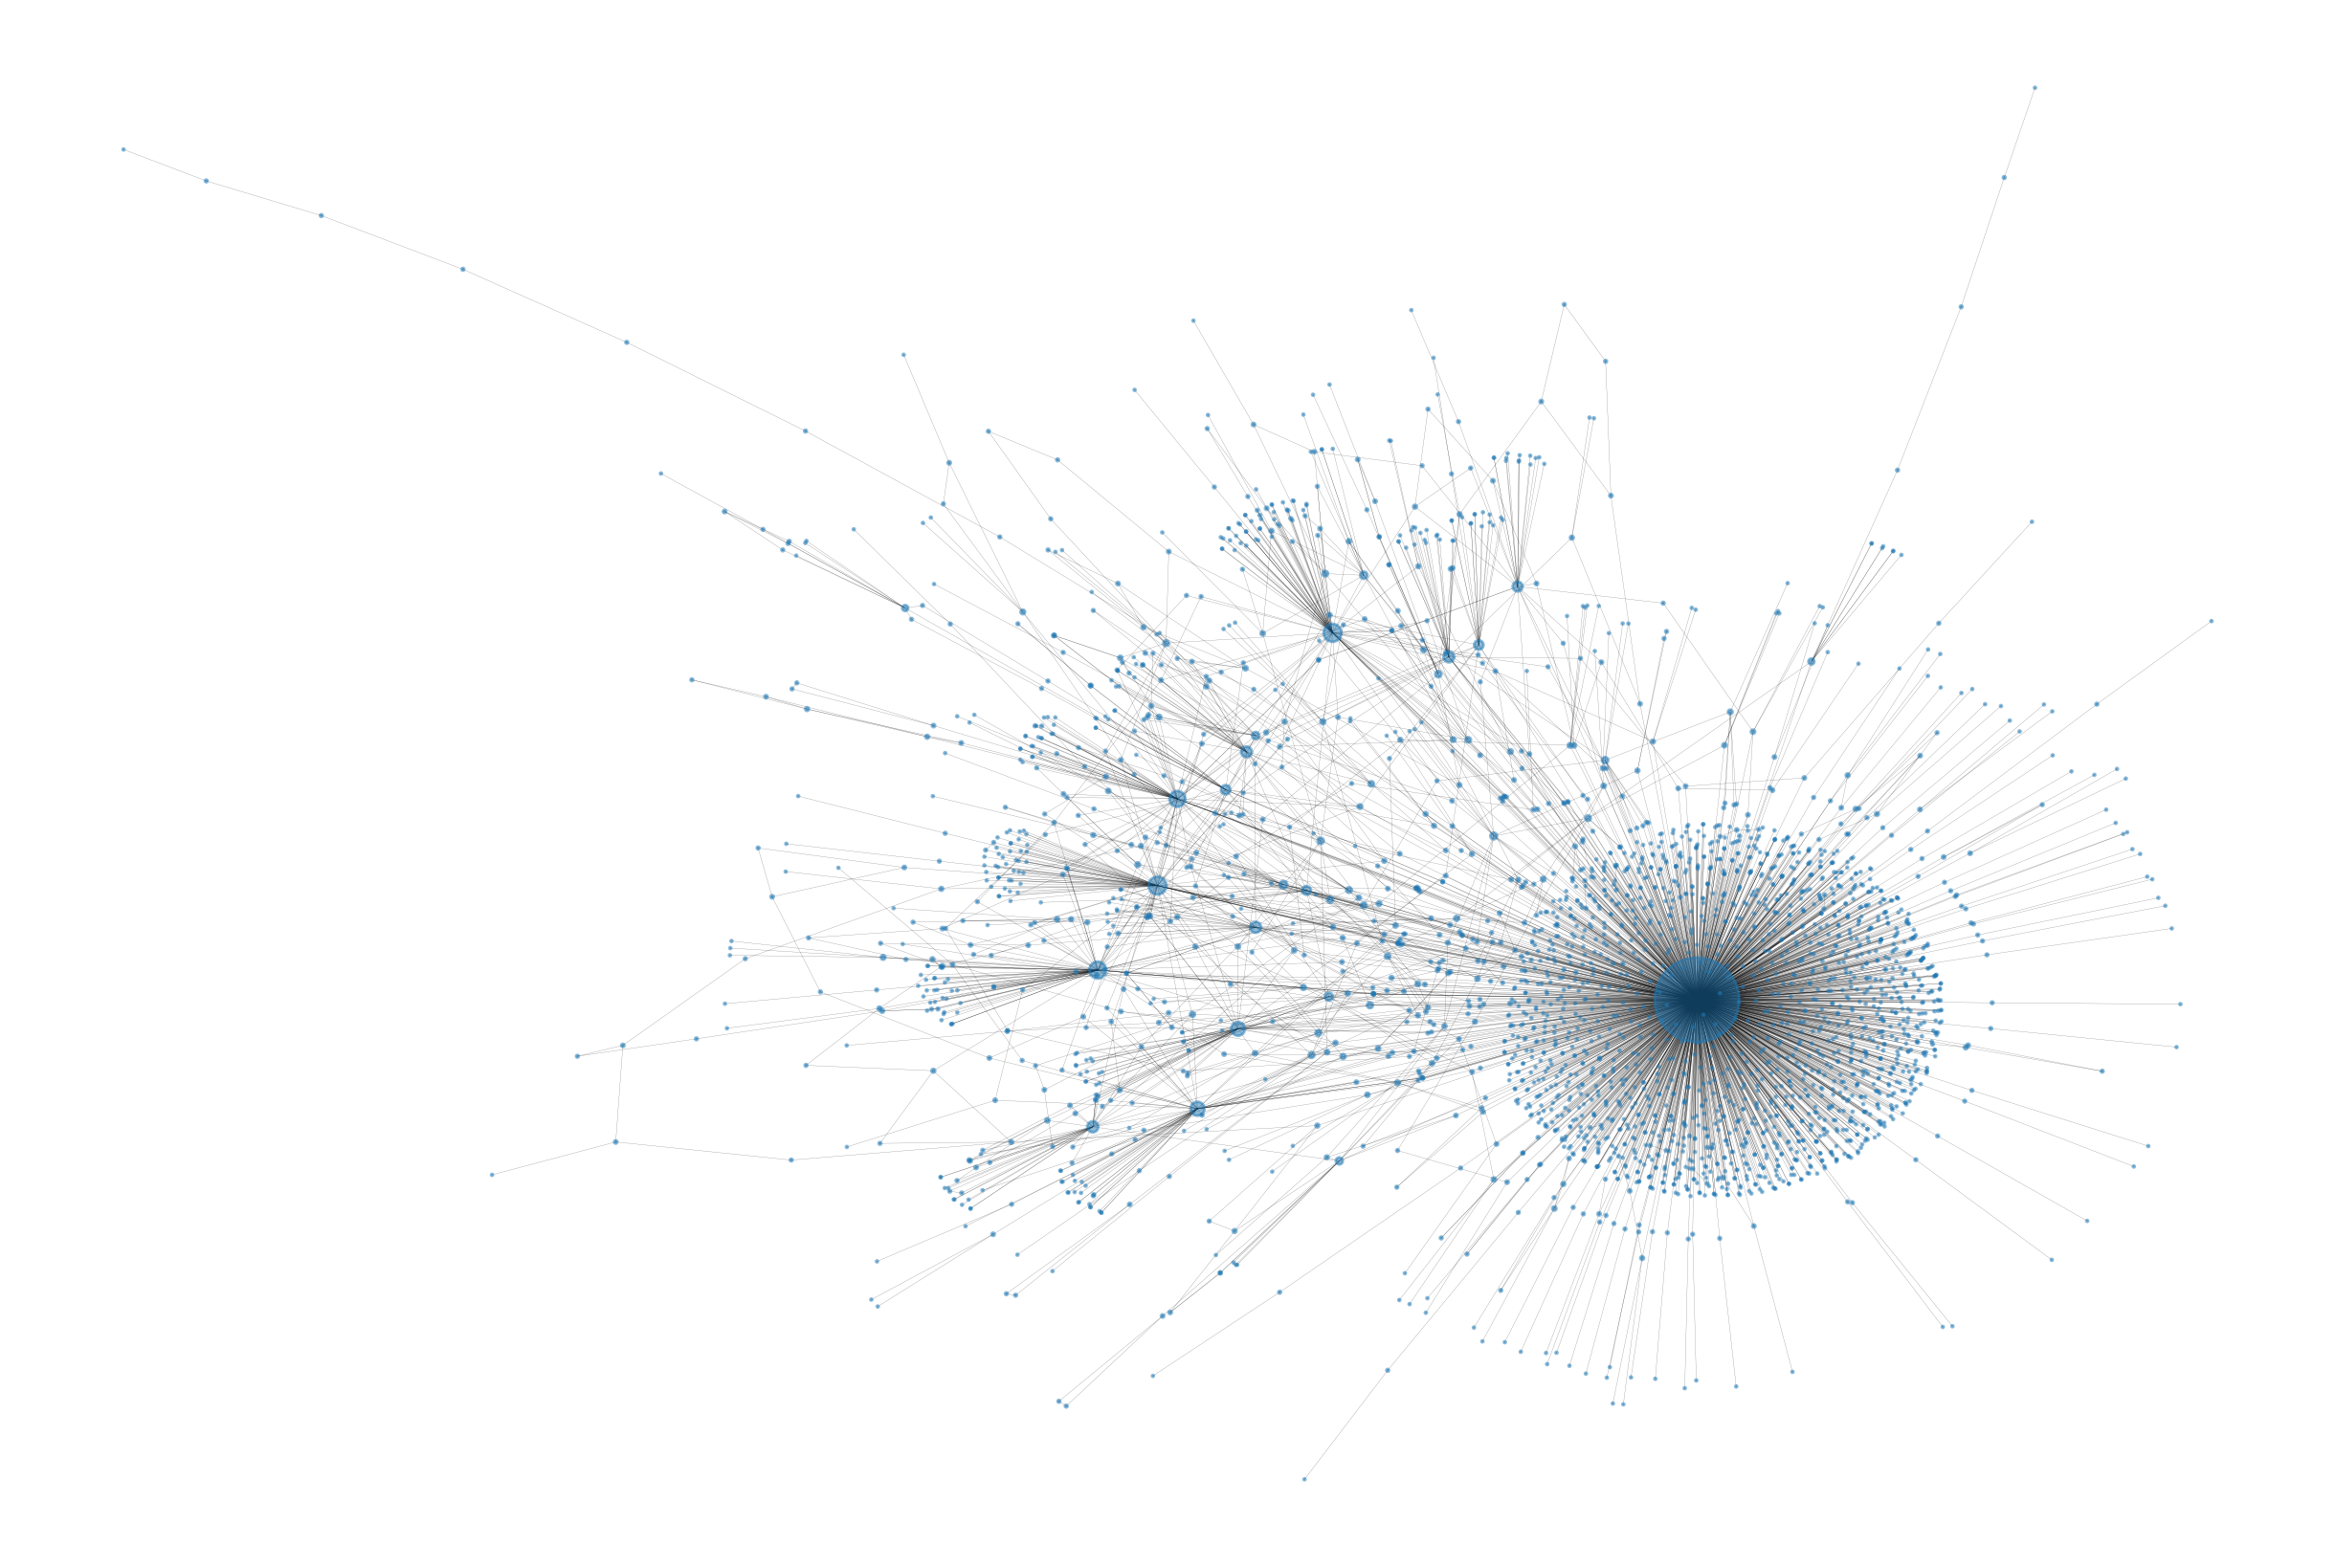

In [113]:
from matplotlib.pyplot import figure
figure(figsize=(12, 8), dpi=200)
nx.draw(G,pos, width=0.1,arrowsize=5,alpha=0.5, node_size= [v * 0.5 for v in degree_dict.values()])

## Word clouds of different emotion's tweets

### 1) Word cloud of Anxious Tweets

In [43]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

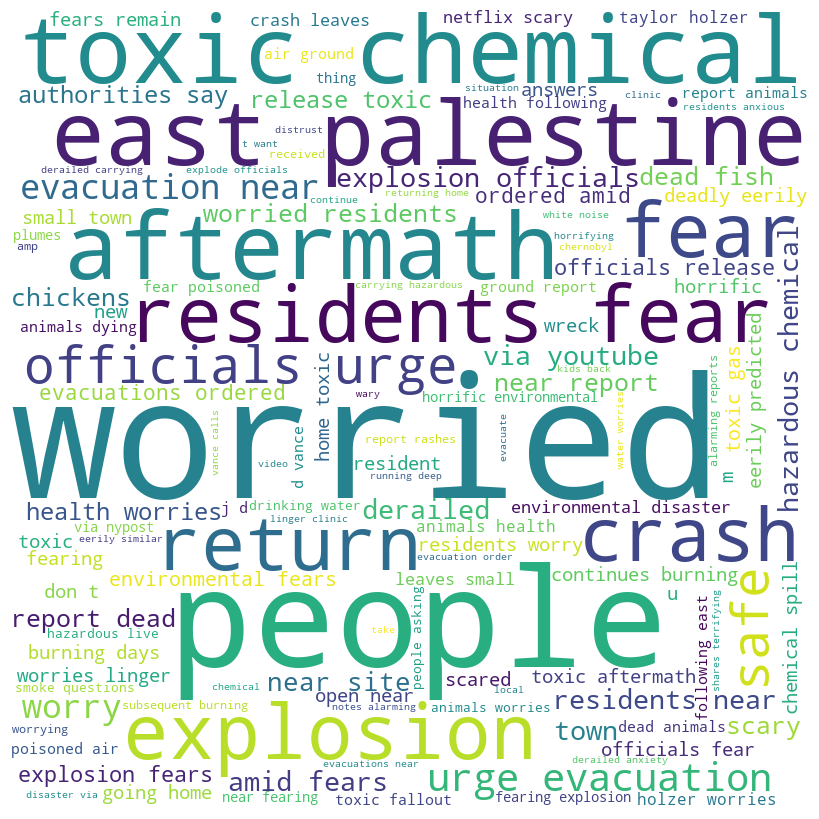

In [44]:
comment_words = ""
stopwords = set(STOPWORDS)
stopwords.add("s")
 
# iterate through the csv file
for val in data[data['emo_anx']>5].Text.apply(lambda x:re.sub("ohio|Ohio|train|Train|derailment|Derailment",'',x)):
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()


### 2) Word cloud of Angry Tweets

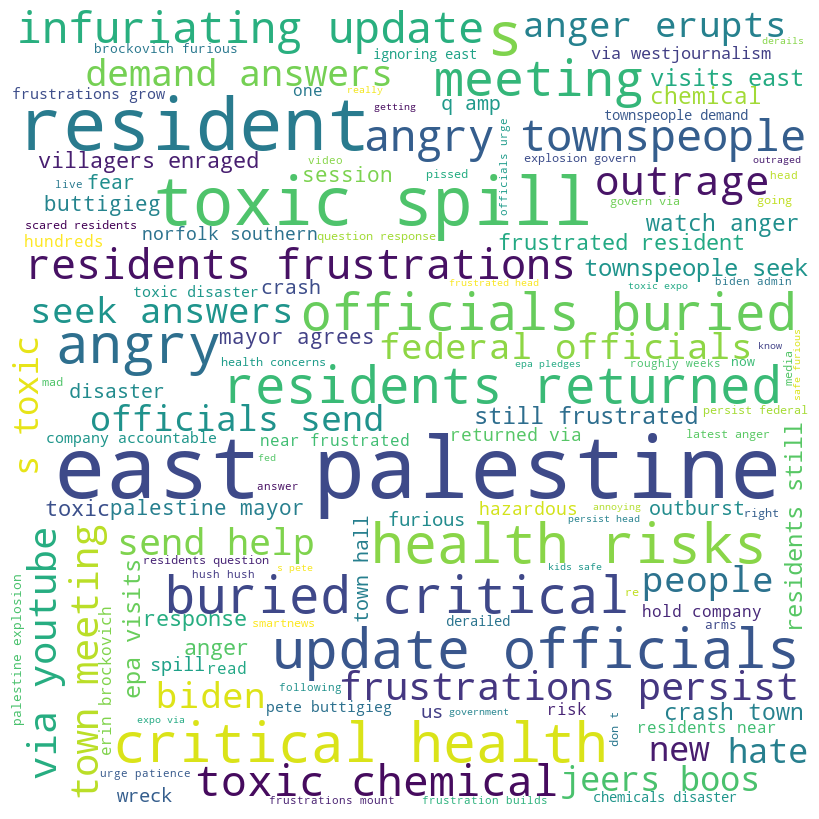

In [45]:
comment_words = ""
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in data[data['emo_anger']>5].Text.apply(lambda x:re.sub("ohio|Ohio|train|Train|derailment|Derailment",'',x)):
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

## Regression between like_count and emotion variables with different models

In [46]:
data = data.replace(0, np.NAN)
reg = data[['likeCount','emotion','politic','health']].dropna()
q1 = np.percentile(reg.likeCount, 25,interpolation='midpoint')
q3 = np.percentile(reg.likeCount, 75,interpolation='midpoint')
iqr = q3 - q1
reg = reg[(reg.likeCount>q1-1.5*iqr)&(reg.likeCount<q3+1.5*iqr)]

In [47]:
model1 = sm.NegativeBinomial.from_formula('likeCount ~ emotion + politic + health', data=reg).fit()
print(model1.summary())
print("AIC: %f BIC: %f" % (model1.aic, model1.bic))

Optimization terminated successfully.
         Current function value: 2.693971
         Iterations: 14
         Function evaluations: 16
         Gradient evaluations: 16
                     NegativeBinomial Regression Results                      
Dep. Variable:              likeCount   No. Observations:                  445
Model:               NegativeBinomial   Df Residuals:                      441
Method:                           MLE   Df Model:                            3
Date:                Wed, 01 Mar 2023   Pseudo R-squ.:                0.005785
Time:                        13:08:35   Log-Likelihood:                -1198.8
converged:                       True   LL-Null:                       -1205.8
Covariance Type:            nonrobust   LLR p-value:                  0.002971
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6184      0.150     1

In [48]:
model2 = sm.Poisson.from_formula('likeCount ~ emotion + politic + health', data=reg).fit()
print(model2.summary())
print("AIC: %f BIC: %f" % (model2.aic, model2.bic))

Optimization terminated successfully.
         Current function value: 4.628093
         Iterations 5
                          Poisson Regression Results                          
Dep. Variable:              likeCount   No. Observations:                  445
Model:                        Poisson   Df Residuals:                      441
Method:                           MLE   Df Model:                            3
Date:                Wed, 01 Mar 2023   Pseudo R-squ.:                 0.02687
Time:                        13:08:35   Log-Likelihood:                -2059.5
converged:                       True   LL-Null:                       -2116.4
Covariance Type:            nonrobust   LLR p-value:                 1.739e-24
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.5366      0.060     25.803      0.000       1.420       1.653
emotion        0.1196      0.